In [1]:
pip install causalinference

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 51 kB 2.3 MB/s 


In [2]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
from matplotlib import style
from matplotlib import pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
from causalinference import CausalModel

import graphviz as gr

%matplotlib inline

style.use("fivethirtyeight")
pd.set_option("display.max_columns", 6)

from google.colab import files
uploaded = files.upload()

MessageError: ignored

In [ ]:
df = pd.read_excel("DatosEducacion.xlsx")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 668 entries, 0 to 667
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   DIRECTORIO             668 non-null    int64  
 1   P1_DEPARTAMENTO        668 non-null    int64  
 2   SECUENCIA_ENCUESTA     668 non-null    int64  
 3   NivelEducativoCursado  668 non-null    int64  
 4   TipoEstablecimiento    668 non-null    int64  
 5   UbicacionColegio       668 non-null    int64  
 6   MinutosAColegio        668 non-null    int64  
 7   AlimentosEscuela       668 non-null    int64  
 8   PagoMatricula          668 non-null    int64  
 9   PagoUniforme           668 non-null    int64  
 10  PagoUtiles             668 non-null    int64  
 11  PagoPension            668 non-null    int64  
 12  PagoTransporte         668 non-null    int64  
 13  RecibioBeca            668 non-null    int64  
 14  Tratamiento            668 non-null    float64
 15  Tratam

In [ ]:
smf.ols("NivelEducativoCursado ~ TratamientoFin", data=df).fit().summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,3.1948,0.085,37.426,0.000,3.027,3.362
TratamientoFin,-0.1165,0.124,-0.943,0.346,-0.359,0.126


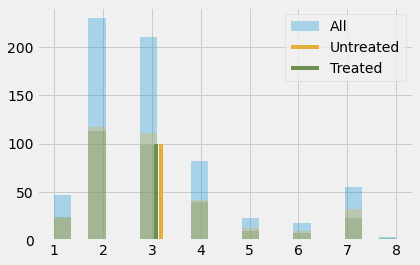

In [ ]:
plt.hist(df["NivelEducativoCursado"], bins=20, alpha=0.3, label="All")
plt.hist(df.query("TratamientoFin==0")["NivelEducativoCursado"], bins=20, alpha=0.3, color="C2")
plt.hist(df.query("TratamientoFin==1")["NivelEducativoCursado"], bins=20, alpha=0.3, color="C3")
plt.vlines(3.1948, 0, 100, label="Untreated", color="C2")
plt.vlines(3.1948+-0.1165, 0, 100, label="Treated", color="C3")
plt.legend();

In [ ]:
df

,DIRECTORIO,P1_DEPARTAMENTO,SECUENCIA_ENCUESTA,...,RecibioBeca,Tratamiento,TratamientoFin
0,3013752,25,3,...,0,0.997964,1
1,3003749,25,2,...,0,0.997443,1
2,3016628,25,4,...,0,0.996477,1
3,2998448,25,3,...,0,0.996050,1
4,3008596,25,2,...,0,0.992672,1
...,...,...,...,...,...,...,...
663,2995748,25,4,...,0,0.005484,0
664,3008083,25,3,...,0,0.003117,0
665,2996882,25,3,...,0,0.002422,0
666,3009224,25,6,...,0,0.001857,0


In [ ]:
categ = ["UbicacionColegio"]
cont = ["AlimentosEscuela", "PagoMatricula", "PagoUniforme", "PagoUtiles", "PagoPension"]

data_with_categ = pd.concat([
    df.drop(columns=categ), # dataset without the categorical features
    pd.get_dummies(df[categ], columns=categ, drop_first=False)# categorical features converted to dummies
], axis=1)

print(data_with_categ.shape)

(668, 18)


In [ ]:
data_with_categ

,DIRECTORIO,P1_DEPARTAMENTO,SECUENCIA_ENCUESTA,...,UbicacionColegio_1,UbicacionColegio_2,UbicacionColegio_3
0,3013752,25,3,...,1,0,0
1,3003749,25,2,...,1,0,0
2,3016628,25,4,...,1,0,0
3,2998448,25,3,...,1,0,0
4,3008596,25,2,...,1,0,0
...,...,...,...,...,...,...,...
663,2995748,25,4,...,1,0,0
664,3008083,25,3,...,1,0,0
665,2996882,25,3,...,1,0,0
666,3009224,25,6,...,1,0,0


In [ ]:
data_with_categ.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 668 entries, 0 to 667
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   DIRECTORIO             668 non-null    int64  
 1   P1_DEPARTAMENTO        668 non-null    int64  
 2   SECUENCIA_ENCUESTA     668 non-null    int64  
 3   NivelEducativoCursado  668 non-null    int64  
 4   TipoEstablecimiento    668 non-null    int64  
 5   MinutosAColegio        668 non-null    int64  
 6   AlimentosEscuela       668 non-null    int64  
 7   PagoMatricula          668 non-null    int64  
 8   PagoUniforme           668 non-null    int64  
 9   PagoUtiles             668 non-null    int64  
 10  PagoPension            668 non-null    int64  
 11  PagoTransporte         668 non-null    int64  
 12  RecibioBeca            668 non-null    int64  
 13  Tratamiento            668 non-null    float64
 14  TratamientoFin         668 non-null    int64  
 15  Ubicac

In [ ]:
from sklearn.linear_model import LogisticRegression

T = 'TratamientoFin'
Y = 'NivelEducativoCursado'
X = data_with_categ.columns.drop(['DIRECTORIO', T, Y])

ps_model = LogisticRegression(C=1e6).fit(data_with_categ[X], data_with_categ[T])

data_ps = df.assign(propensity_score=ps_model.predict_proba(data_with_categ[X])[:, 1])

data_ps[["TratamientoFin", "NivelEducativoCursado", "propensity_score"]].head()

,TratamientoFin,NivelEducativoCursado,propensity_score
0,1,4,0.550890
1,1,2,0.503083
2,1,2,0.475052
3,1,4,0.452170
4,1,7,0.476184


In [ ]:
weight_t = 1/data_ps.query("TratamientoFin==1")["propensity_score"]
weight_nt = 1/(1-data_ps.query("TratamientoFin==0")["propensity_score"])
print("Original Sample Size", df.shape[0])
print("Treated Population Sample Size", sum(weight_t))
print("Untreated Population Sample Size", sum(weight_nt))

Original Sample Size 668
Treated Population Sample Size 645.8425489877644
Untreated Population Sample Size 689.1683891256723


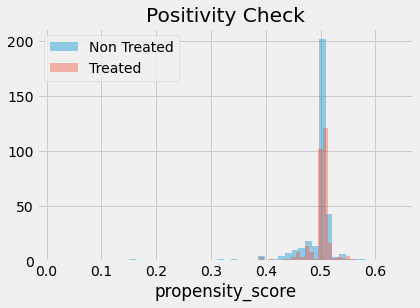

In [ ]:
sns.distplot(data_ps.query("TratamientoFin==0")["propensity_score"], kde=False, label="Non Treated")
sns.distplot(data_ps.query("TratamientoFin==1")["propensity_score"], kde=False, label="Treated")
plt.title("Positivity Check")
plt.legend();

Estimador de probabilidad

In [ ]:
weight = ((data_ps["TratamientoFin"]-data_ps["propensity_score"]) /
          (data_ps["propensity_score"]*(1-data_ps["propensity_score"])))

y1 = sum(data_ps.query("TratamientoFin==1")["NivelEducativoCursado"]*weight_t) / len(df)
y0 = sum(data_ps.query("TratamientoFin==0")["NivelEducativoCursado"]*weight_nt) / len(df)

ate = np.mean(weight * data_ps["NivelEducativoCursado"])

print("Y1:", y1)
print("Y0:", y0)
print("ATE", np.mean(weight * data_ps["NivelEducativoCursado"]))

Y1: 3.0131520591918073
Y0: 3.260962127838409
ATE -0.24781006864659993


Estimador del ATE

In [ ]:
from joblib import Parallel, delayed # for parallel processing

# define function that computes the IPTW estimator
def run_ps(df, X, T, Y):
    # estimate the propensity score
    ps = LogisticRegression(C=1e6).fit(df[X], df[T]).predict_proba(df[X])[:, 1]
    
    weight = (df[T]-ps) / (ps*(1-ps)) # define the weights
    return np.mean(weight * df[Y]) # compute the ATE

np.random.seed(88)
# run 1000 bootstrap samples
bootstrap_sample = 1000
ates = Parallel(n_jobs=4)(delayed(run_ps)(data_with_categ.sample(frac=1, replace=True), X, T, Y)
                          for _ in range(bootstrap_sample))
ates = np.array(ates)

In [ ]:
print(f"ATE: {ates.mean()}")
print(f"95% C.I.: {(np.percentile(ates, 2.5), np.percentile(ates, 97.5))}")

ATE: -0.2276444380429947
95% C.I.: (-0.6122079923685588, 0.14913035514232564)


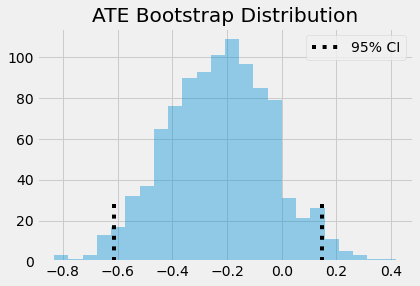

In [ ]:
sns.distplot(ates, kde=False)
plt.vlines(np.percentile(ates, 2.5), 0, 30, linestyles="dotted")
plt.vlines(np.percentile(ates, 97.5), 0, 30, linestyles="dotted", label="95% CI")
plt.title("ATE Bootstrap Distribution")
plt.legend();

In [ ]:
smf.ols("NivelEducativoCursado ~ TratamientoFin + propensity_score", data=data_ps).fit().summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,6.9804,0.614,11.369,0.000,5.775,8.186
TratamientoFin,-0.0471,0.121,-0.390,0.697,-0.284,0.190
propensity_score,-7.7385,1.244,-6.223,0.000,-10.180,-5.297


In [ ]:
cm = CausalModel(
    Y=data_ps["NivelEducativoCursado"].values, 
    D=data_ps["TratamientoFin"].values, 
    X=data_ps[["propensity_score"]].values
)

cm.est_via_matching(matches=1, bias_adj=True)

print(cm.estimates)


Treatment Effect Estimates: Matching

                     Est.       S.e.          z      P>|z|      [95% Conf. int.]
--------------------------------------------------------------------------------
           ATE     -0.172      0.182     -0.942      0.346     -0.529      0.186
           ATC     -0.276      0.202     -1.370      0.171     -0.671      0.119
           ATT     -0.058      0.217     -0.266      0.790     -0.483      0.367

